<a href="https://colab.research.google.com/github/KendallScott/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the Libraries
from scipy.io import arff
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from numpy import random

from google.colab import drive
drive.mount('/content/drive')

In [3]:
df = pd.DataFrame()
i=1
x=str(i)
while i <6:
  data = arff.loadarff('/content/drive/MyDrive/Case_Study_4_Data/'+x+'year.arff')
  df_alt = pd.DataFrame(data[0])
  df = pd.concat([df,df_alt])
  i+=1
  x=str(i)

df


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

In [5]:
for i in df.columns:
  if df[i].isnull().sum() > len(df)*.05:
    print('{} contains {} NAs'.format(i,df[i].isnull().sum()))

Attr21 contains 5854 NAs
Attr27 contains 2764 NAs
Attr37 contains 18984 NAs


In [6]:
x = [n for n in list(range(1,65)) if n not in [27,37]]

for i in x:
  df['Attr'+str(i)] = df[['Attr'+str(i),'class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22 

In [18]:
## commenting it out for now, in case we prefer not to drop the columns

df['Attr1'] = df[['Attr1','class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))


i=1
x=str(i)
while i <65:
  df['Attr'+x] = df[['Attr'+x,'class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))

  i+=1
  x=str(i)

df



,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [9]:
import re

#binary logistic
# roc AUC scores
#precision
#recall
#accuracy
#90s (AUC)
#XGBoost and Random forest

#change where you round at for increases in  precision

In [19]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [47]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].str.replace(r'[b]*', '')
df['class'] = df['class'].str.replace(r'[\']*', '')
df['class'] = df['class'].astype(int)

<ipython-input-47-91df10f0261b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[b]*', '')
<ipython-input-47-91df10f0261b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[\']*', '')


In [48]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [49]:
# Make target variable and data variable
y = df[['class']]
X = df.loc[:, df.columns != 'class']

In [38]:
#need hyperparameter tuning here

In [16]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV


my_pipe = Pipeline([
    ('estimator',RandomForestClassifier(random_state=610,max_depth = 100))
])
pipe_params = {
    'estimator__n_estimators':[50,100,200],
    'estimator__class_weight':['balanced',None]
}

grid = GridSearchCV(my_pipe,pipe_params,cv=StratifiedKFold,scoring='accuracy',n_jobs=-1)
results = grid.fit(X,y)
print(results.best_estimator_)
print(results.best_score_)

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# rf best params
my_pipe = Pipeline([
    ('estimator',RandomForestClassifier(max_depth = 100,
                                        random_state=610,
                                        n_estimators = 200))
])
acc_score = []
rec_score = []
for i, (train,test) in enumerate(skf.split(X,y)):
    my_pipe.fit(X[train],y[train])
    p = my_pipe.predict(X[test])
    acc_score.append(accuracy_score(y[test],p))
    rec_score.append(recall_score(y[test],p))
    print(classification_report(y[test],p))

rf_scores = pd.DataFrame({'accuracy':acc_score,
                           'recall':rec_score})

AttributeError: ignored

In [51]:
accuracy = []
recall = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a random forest model
rfc = RandomForestClassifier(n_estimators = 100)

# Train the model
rfc.fit(X_train, y_train)

# Predict
y_pred_rfc = rfc.predict(X_test)

# Calculate the
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

print('Accuracy:', rfc_accuracy)

cr = classification_report(y_test,y_pred_rfc, output_dict=True)
accuracy.append(cr.get('accuracy'))
recall.append(cr.get('1').get('recall'))
print(cr)

<ipython-input-51-542f3ee7c83c>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9812233613638982
{'0': {'precision': 0.9825124910778016, 'recall': 0.9980664652567975, 'f1-score': 0.9902284035729274, 'support': 8275}, '1': {'precision': 0.9418181818181818, 'recall': 0.6379310344827587, 'f1-score': 0.7606461086637298, 'support': 406}, 'accuracy': 0.9812233613638982, 'macro avg': {'precision': 0.9621653364479916, 'recall': 0.817998749869778, 'f1-score': 0.8754372561183286, 'support': 8681}, 'weighted avg': {'precision': 0.9806092668456386, 'recall': 0.9812233613638982, 'f1-score': 0.9794911138905023, 'support': 8681}}


In [55]:
import xgboost as xgb
from xgboost import DMatrix

In [56]:
dtrain = DMatrix(X, label=y)
dtest = DMatrix(X_test, label=y_test)

In [99]:
hyperparams = { 'objective': 'binary:logistic',
                'eta':0.01,
                'max_depth': 3,
                'objective': 'multi:softmax',
                'num_class':10}

out = xgb.cv(params=hyperparams, num_boost_round=100, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)

[0]	train-mlogloss:2.25584+0.00002	test-mlogloss:2.25587+0.00004
[1]	train-mlogloss:2.21133+0.00003	test-mlogloss:2.21140+0.00008
[2]	train-mlogloss:2.16887+0.00004	test-mlogloss:2.16896+0.00012
[3]	train-mlogloss:2.12826+0.00006	test-mlogloss:2.12838+0.00015
[4]	train-mlogloss:2.08936+0.00007	test-mlogloss:2.08948+0.00017
[5]	train-mlogloss:2.05202+0.00009	test-mlogloss:2.05218+0.00019
[6]	train-mlogloss:2.01614+0.00010	test-mlogloss:2.01631+0.00022
[7]	train-mlogloss:1.98161+0.00012	test-mlogloss:1.98178+0.00023
[8]	train-mlogloss:1.94832+0.00013	test-mlogloss:1.94851+0.00027
[9]	train-mlogloss:1.91620+0.00014	test-mlogloss:1.91641+0.00029
[10]	train-mlogloss:1.88517+0.00016	test-mlogloss:1.88540+0.00030
[11]	train-mlogloss:1.85516+0.00017	test-mlogloss:1.85541+0.00033
[12]	train-mlogloss:1.82611+0.00018	test-mlogloss:1.82638+0.00035
[13]	train-mlogloss:1.79796+0.00018	test-mlogloss:1.79825+0.00037
[14]	train-mlogloss:1.77066+0.00020	test-mlogloss:1.77095+0.00038
[15]	train-mlogloss:

In [101]:
out

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.603585,0.000141,0.603842,0.000188
1,0.530233,0.000287,0.530704,0.000282
2,0.468979,0.000479,0.469670,0.000384
3,0.417194,0.000598,0.418024,0.000597
4,0.373158,0.000698,0.374127,0.000760
5,0.335218,0.000724,0.336306,0.000933
6,0.302376,0.000822,0.303623,0.001086
7,0.273843,0.000830,0.275226,0.001211
8,0.248838,0.000826,0.250377,0.001416
9,0.226965,0.000850,0.228641,0.001554


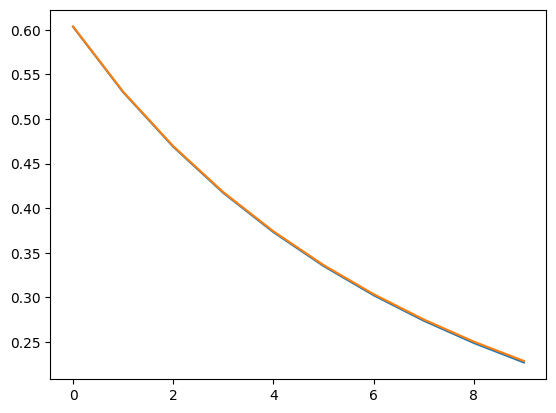

In [103]:
import matplotlib.pyplot as plt

#needs to run longer to see differences in the lines?
plt.plot(out['train-logloss-mean'])
plt.plot(out['test-logloss-mean'])
plt.show()

In [109]:
for i in range(trials):
  #random index
  lr_idx = np.random.choice(list(range(len(learning_rates))), p=np.ones(len(learning_rates))/len(learning_rates))
  print(lr_idx)
  print(learning_rates[lr_idx])


5
0.5
4
0.4
2
0.25
4
0.4
0
0.01
3
0.3
0
0.01
5
0.5
3
0.3
2
0.25
1
0.1
4
0.4
2
0.25
3
0.3
0
0.01
3
0.3
3
0.3
3
0.3
5
0.5
4
0.4


In [ ]:
#sample code for random search from live session copy/pasta
learning_rates = [0.01, 0.1, 0.25, 0.3, 0.4, 0.5]
max_depths = [1, 3, 5, 7, 10, 13, 15]
#colsample_by_tree = [0.5, 0.33]

trials = 20
best_params = {}

for i in range(trials):
  #random index
  lr_idx = np.random.choice(list(range(len(learning_rates))), p=np.ones(len(learning_rates))/len(learning_rates))
  md_idx = np.random.choice(list(range(len(max_depths))), p=np.ones(len(max_depths))/len(max_depths))
  learning_rate= learning_rates[lr_idx]
  max_depth = max_depths[md_idx]
  hyperparams = {'objective': 'binary:logistic', 'eta': learning_rate, 'max_depth': max_depth}

  print(hyperparams)
  out=xgb.cv(params=hyperparams,  num_boost_round=5, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)
  index=out.shape[0]-1
  result=out.iloc[index,2]

  if i < 1:
    best_result = result
    best_params = params


  if result< best_result:
      best_result = result
      best_params = params
      print(result)
      print(best_result)
      print(params)
      print(best_params)


{'objective': 'binary:logistic', 'eta': 0.4, 'max_depth': 10}
[0]	train-logloss:0.38699+0.00045	test-logloss:0.38975+0.00084
[1]	train-logloss:0.24590+0.00057	test-logloss:0.25098+0.00153
